In [1]:
!pip install geopandas
!pip install mapclassify
!pip install rasterio

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 268 kB/s 
     |████████████████████████████████| 6.3 MB 39.9 MB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [49]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import geopandas as gp
import folium
import geopandas
import mapclassify
import zipfile
import requests
import xml.etree.ElementTree as ET
import rasterio
from rasterio.plot import show
from tqdm import tqdm

!mkdir fip_tif

mkdir: cannot create directory ‘fip_tif’: File exists


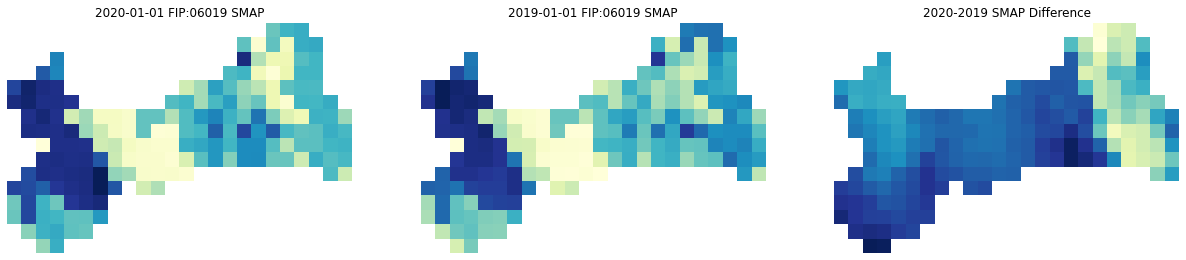

In [28]:
#get weekly average SMAP by FIP

def get_SMAP_image(date, fip):
    fip = fip
    date = date

    url = f'https://cloud.csiss.gmu.edu/smap_service?service=WPS&version=1.0.0&request=Execute&identifier=GetFileByFips&DataInputs=layer=SMAP-9KM-DAILY-SUB_{date}_AVERAGE;fips={fip}'

    r = requests.get(url)

    response_xml_as_string = r.text
    responseXml = ET.fromstring(response_xml_as_string)

    tif_url = responseXml[2][0][3][0].text
    !wget $tif_url -O $'fip_tif/{fip}_{date}.tif' -q --no-check-certificate

    return rasterio.open(f'fip_tif/{fip}_{date}.tif')

im1 = get_SMAP_image('2020.01.01', '06019')
im2 = get_SMAP_image('2019.01.01', '06019')
dif = im1.read(masked=True) - im2.read(masked=True)

fig, ax = plt.subplots(1,3, figsize=(21,7))

show(dif, ax=ax[2], cmap = 'YlGnBu')

show(im2, ax=ax[1],cmap = 'YlGnBu')
show(im1, ax=ax[0],cmap = 'YlGnBu')

ax[0].set_title('2020-01-01 FIP:06019 SMAP')
ax[1].set_title('2019-01-01 FIP:06019 SMAP')
ax[2].set_title('2020-2019 SMAP Difference')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.show()




100%|██████████| 20/20 [00:37<00:00,  1.89s/it]


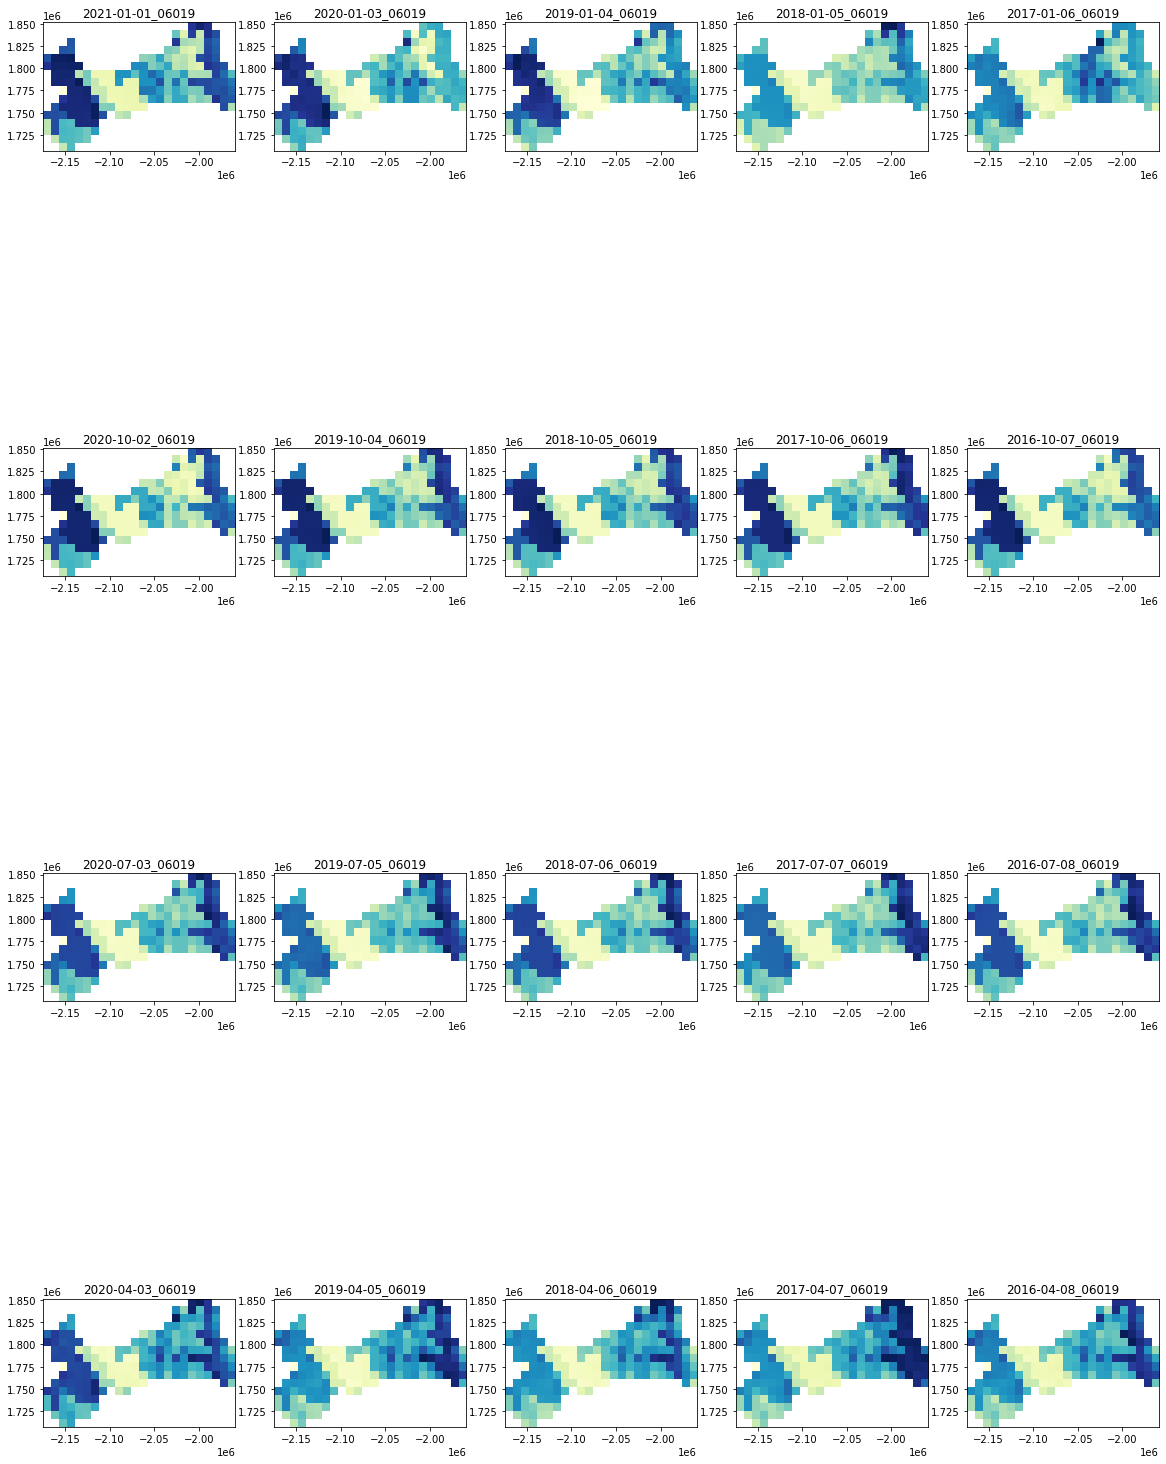

In [50]:
num_quarters = 20
fip = '06019'
base = datetime.date.fromisoformat('2021-01-01')
date_list = [base - datetime.timedelta(weeks=(x*13)) for x in range(num_quarters)]

fig, ax = plt.subplots(4, 5, figsize=(20,30))
for i in tqdm(range(num_quarters)):
    show(get_SMAP_image(date_list[i].strftime('%Y.%m.%d'), fip), ax = ax[i % 4][i // 4], cmap = 'YlGnBu')
    ax[i % 4][i // 4].set_title(f'{(date_list[i].isoformat())}_{fip}')

plt.show()
